In [1]:
import os

os.chdir(r"E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining")
print("Working directory:", os.getcwd())
print(os.getcwd())        # lokasi kerja
print(os.listdir())       # list semua file di folder
os.chdir(r"E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining")
print("Working directory:", os.getcwd())

Working directory: E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining
E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining
['.git', 'data mining bismillah', 'Data_ACQUISITION.ipynb', 'Data_EDA.ipnyb.ipynb', 'Data_Modelling.ipynb', 'Data_PREPROCESSING.ipynb', 'Untitled-1.ipynb', 'Weather_Data_Mentah.csv', 'Weather_Data_PreProcesing.csv']
Working directory: E:\Berbagai Tugas\Tugasss\Semester 5\Konversi DataMining


In [2]:
import pandas as pd

df = pd.read_csv("Weather_Data_PreProcesing.csv")

print(df.shape)
df.head()


(40, 11)


,datetime,temperature_celsius,humidity_percent,pressure_hpa,wind_speed_ms,hour,day,day_of_week,weather_main,weather_encoded,is_rain
0,2025-12-28 22:00:00,27.79,80,1009,0.91,22,28,Sunday,Rain,1,1
1,2025-12-29 01:00:00,27.05,83,1009,1.02,1,29,Monday,Rain,1,1
2,2025-12-29 04:00:00,25.94,86,1008,1.48,4,29,Monday,Rain,1,1
3,2025-12-29 07:00:00,27.39,78,1009,1.58,7,29,Monday,Clouds,0,0
4,2025-12-29 10:00:00,30.52,59,1008,1.83,10,29,Monday,Clouds,0,0


In [3]:
# Fitur (X)
X = df[
    [
        "temperature_celsius",
        "humidity_percent",
        "pressure_hpa",
        "wind_speed_ms"
    ]
]

# Target (y)
y = df["weather_main"]

print(X.head())
print(y.value_counts())


   temperature_celsius  humidity_percent  pressure_hpa  wind_speed_ms
0                27.79                80          1009           0.91
1                27.05                83          1009           1.02
2                25.94                86          1008           1.48
3                27.39                78          1009           1.58
4                30.52                59          1008           1.83
weather_main
Rain      26
Clouds    14
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


print("Mapping label:")
for i, label in enumerate(le.classes_):
    print(i, "->", label)


Mapping label:
0 -> Clouds
1 -> Rain


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(X_train.shape, X_test.shape)


(32, 4) (8, 4)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.875

Classification Report:

              precision    recall  f1-score   support

      Clouds       1.00      0.67      0.80         3
        Rain       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8

Confusion Matrix:
[[2 1]
 [0 5]]


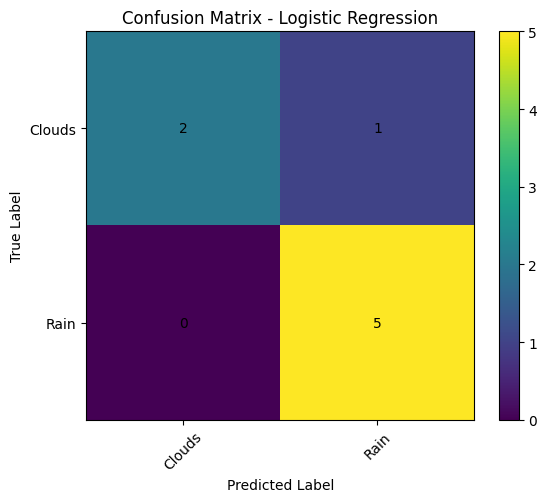

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.colorbar()

plt.xticks(
    ticks=np.arange(len(le.classes_)),
    labels=le.classes_,
    rotation=45
)
plt.yticks(
    ticks=np.arange(len(le.classes_)),
    labels=le.classes_
)

# Tulis angka di tiap sel
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5
)

dt_model.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred_dt = dt_model.predict(X_test)

print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Accuracy (Decision Tree): 0.5

Classification Report:

              precision    recall  f1-score   support

      Clouds       0.00      0.00      0.00         3
        Rain       0.57      0.80      0.67         5

    accuracy                           0.50         8
   macro avg       0.29      0.40      0.33         8
weighted avg       0.36      0.50      0.42         8

Confusion Matrix:
[[0 3]
 [1 4]]


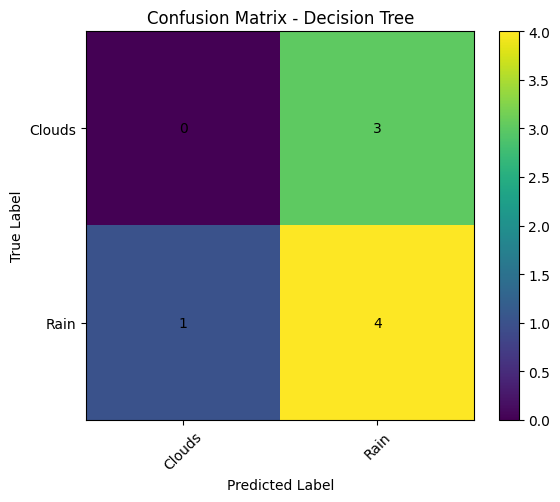

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 5))
plt.imshow(cm_dt)
plt.colorbar()

plt.xticks(
    ticks=np.arange(len(le.classes_)),
    labels=le.classes_,
    rotation=45
)
plt.yticks(
    ticks=np.arange(len(le.classes_)),
    labels=le.classes_
)

# Tampilkan angka di tiap sel
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        plt.text(j, i, cm_dt[i, j],
                 ha="center", va="center")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Tree")
plt.tight_layout()
plt.show()
